# GetAround

## Analyses


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
URL_DELAY = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx"
URL_PRICING = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv"

In [134]:

df = pd.read_excel(URL_DELAY, sheet_name='rentals_data', engine="openpyxl")

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [135]:
df.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


On retire les locations annulées

In [136]:
df = df.loc[df["state"] == "ended", :]

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0


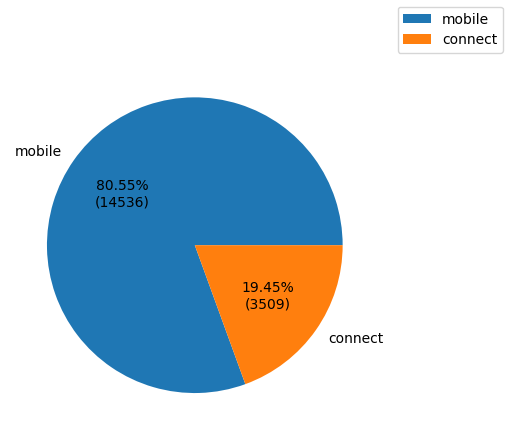

In [137]:
type_value_counts = df.checkin_type.value_counts()
plt.pie(type_value_counts, labels=type_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(type_value_counts)/100 :.0f})')
plt.figlegend(type_value_counts.index)
plt.show()

In [138]:
def get_delay_state(minutes):
    if (minutes < 0):
        return "early"
    elif (minutes > 0 ):
        return "late"
    else:
        return "on time"

df["delay_state"] = df["delay_at_checkout_in_minutes"].apply(get_delay_state)

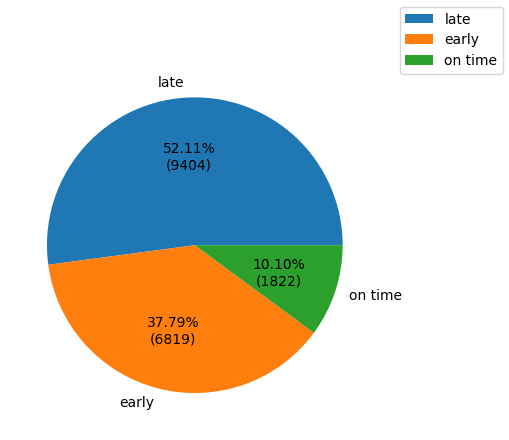

In [139]:
delay_state_value_counts = df.delay_state.value_counts()
plt.pie(delay_state_value_counts, labels=delay_state_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(delay_state_value_counts)/100 :.0f})')
plt.figlegend(delay_state_value_counts.index)
plt.show()

In [140]:
px.histogram(
    df.loc[(df["delay_at_checkout_in_minutes"] > 0) & (df["delay_at_checkout_in_minutes"] <= 200), ], 
    x="delay_at_checkout_in_minutes", 
    nbins=40,
    color="checkin_type"
)

In [141]:
def late_category(x):
    if (x > 60*24):
        return "> 1 day"
    elif (x > 60*2):
        return "> 2 hours"
    elif (x > 60):
        return "between 1h & 2h"
    elif (x > 30):
        return "between 30min & 1h"
    elif (x > 15):
        return "between 15min & 30min"
    elif (x > 0):
        return "< 15min"
    else:
        return "on time"

late_category_ordered = ["on time", "< 15min", "between 15min & 30min", "between 30min & 1h",
                               "between 1h & 2h", "> 2 hours", "> 1 day"]

df["late_category"] = df.delay_at_checkout_in_minutes.apply(late_category)
df["late_category"] = pd.Categorical(df["late_category"], ordered=True,
                   categories=late_category_ordered)

In [142]:
px.histogram(
    df.sort_values(['late_category']), 
    x="late_category", 
    nbins=7,
    color="checkin_type"
)

In [143]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_state,late_category
1,507750,269550,mobile,ended,-81.0,NaN,NaN,early,on time
2,508131,359049,connect,ended,70.0,NaN,NaN,late,between 1h & 2h
4,511440,313932,mobile,ended,NaN,NaN,NaN,on time,on time
5,511626,398802,mobile,ended,-203.0,NaN,NaN,early,on time
6,511639,370585,connect,ended,-15.0,563782.0,570.0,early,on time


In [144]:
linked_df = pd.merge(left=df, right=df, how="left", 
                     left_on="previous_ended_rental_id", right_on="rental_id", suffixes=('', '_previous'))

linked_df = linked_df.drop(["car_id", "state", "delay_at_checkout_in_minutes", "rental_id_previous", "car_id_previous", 
              "previous_ended_rental_id_previous", "time_delta_with_previous_rental_in_minutes_previous", 
              "state_previous"], axis=1)

linked_df = linked_df.rename({
    "time_delta_with_previous_rental_in_minutes": "time_delta_in_minutes"
    }, axis=1)

linked_df = linked_df.loc[linked_df.previous_ended_rental_id.isna() == False, :]
linked_df.head()

,rental_id,checkin_type,previous_ended_rental_id,time_delta_in_minutes,delay_state,late_category,checkin_type_previous,delay_at_checkout_in_minutes_previous,delay_state_previous,late_category_previous
4,511639,connect,563782.0,570.0,early,on time,connect,136.0,late,> 2 hours
13,519491,mobile,545639.0,420.0,late,between 30min & 1h,mobile,140.0,late,> 2 hours
16,521156,mobile,537298.0,0.0,on time,on time,mobile,NaN,on time,on time
24,525044,mobile,510607.0,60.0,on time,on time,mobile,-113.0,early,on time
30,528808,connect,557404.0,330.0,early,on time,connect,-352.0,early,on time


In [145]:
linked_df["delay_at_checkout_in_minutes_previous"] = linked_df["delay_at_checkout_in_minutes_previous"].apply(lambda x: x if x > 0 else 0)
linked_df["delta_checkout_next_checkin"] = (linked_df["time_delta_in_minutes"] - linked_df["delay_at_checkout_in_minutes_previous"]) * -1
linked_df["late_for_next_checkin"] = linked_df["delta_checkout_next_checkin"] > 0
linked_df.loc[linked_df.late_for_next_checkin].head()

,rental_id,checkin_type,previous_ended_rental_id,time_delta_in_minutes,delay_state,late_category,checkin_type_previous,delay_at_checkout_in_minutes_previous,delay_state_previous,late_category_previous,delta_checkout_next_checkin,late_for_next_checkin
124,540479,mobile,539751.0,0.0,late,< 15min,mobile,3.0,late,< 15min,3.0,True
138,541862,mobile,540607.0,0.0,late,> 2 hours,mobile,1.0,late,< 15min,1.0,True
378,559781,mobile,540868.0,0.0,late,between 30min & 1h,mobile,26.0,late,between 15min & 30min,26.0,True
606,574568,mobile,572909.0,0.0,late,between 1h & 2h,mobile,13.0,late,< 15min,13.0,True
697,535519,connect,533413.0,0.0,early,on time,connect,4.0,late,< 15min,4.0,True


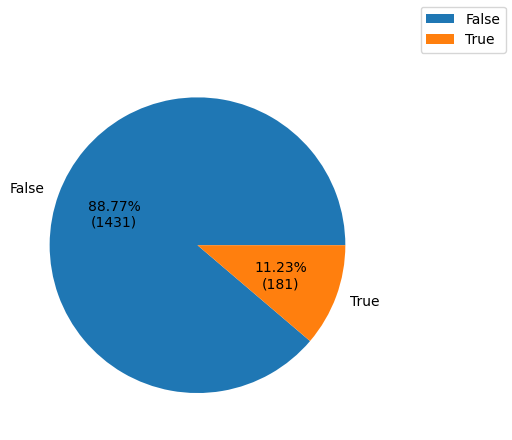

In [146]:
late_checkin_value_counts = linked_df.late_for_next_checkin.value_counts()
plt.pie(late_checkin_value_counts, labels=late_checkin_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(late_checkin_value_counts)/100 :.0f})')
plt.figlegend(late_checkin_value_counts.index)
plt.show()

In [147]:
px.histogram(
    linked_df.loc[(linked_df["delta_checkout_next_checkin"] < (60 * 24)) & (linked_df["delta_checkout_next_checkin"] > 0), :], 
    x="delta_checkout_next_checkin", 
    nbins=24*4
)

In [148]:
linked_df["delta_checkout_next_checkin"] = linked_df["delta_checkout_next_checkin"].apply(late_category)
linked_df["delta_checkout_next_checkin"] = pd.Categorical(linked_df["delta_checkout_next_checkin"], ordered=True,
                   categories=late_category_ordered)

In [149]:
px.histogram(
    linked_df.sort_values(['delta_checkout_next_checkin']), 
    x="delta_checkout_next_checkin", 
    nbins=7,
    color="checkin_type"
)

In [189]:
THRESHOLD = 61 # Delay in minutes
SCOPE = "mobile" # Only for mobile car

In [190]:
linked_df["is_removed_by_new_rules"] = (linked_df["time_delta_in_minutes"] < THRESHOLD) & (linked_df["checkin_type"] == SCOPE)
linked_df[["time_delta_in_minutes", "checkin_type", "is_removed_by_new_rules"]].head()

,time_delta_in_minutes,checkin_type,is_removed_by_new_rules
4,570.0,connect,False
13,420.0,mobile,False
16,0.0,mobile,True
24,60.0,mobile,True
30,330.0,connect,False


In [191]:
print("Rent removed by the new rules :")
print(linked_df.loc[linked_df["is_removed_by_new_rules"]].count().iloc[0])
print((linked_df.loc[linked_df["is_removed_by_new_rules"]].count().iloc[0] / linked_df.count() * 100).iloc[0], ' %')

Rent removed by the new rules :
297
18.424317617866002  %


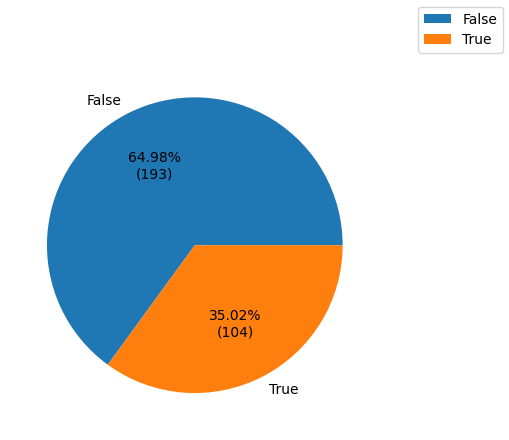

In [192]:
rent_removed = linked_df.loc[linked_df["is_removed_by_new_rules"],:]

rent_removed_late_checkin_value_counts = rent_removed.late_for_next_checkin.value_counts()
plt.pie(rent_removed_late_checkin_value_counts, labels=rent_removed_late_checkin_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(rent_removed_late_checkin_value_counts)/100 :.0f})')
plt.figlegend(rent_removed_late_checkin_value_counts.index)
plt.show()

## Optimisation des prix

In [3]:
df = pd.read_csv(URL_PRICING, index_col=0)
df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
df.describe(include="all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


Aucune données manquantes

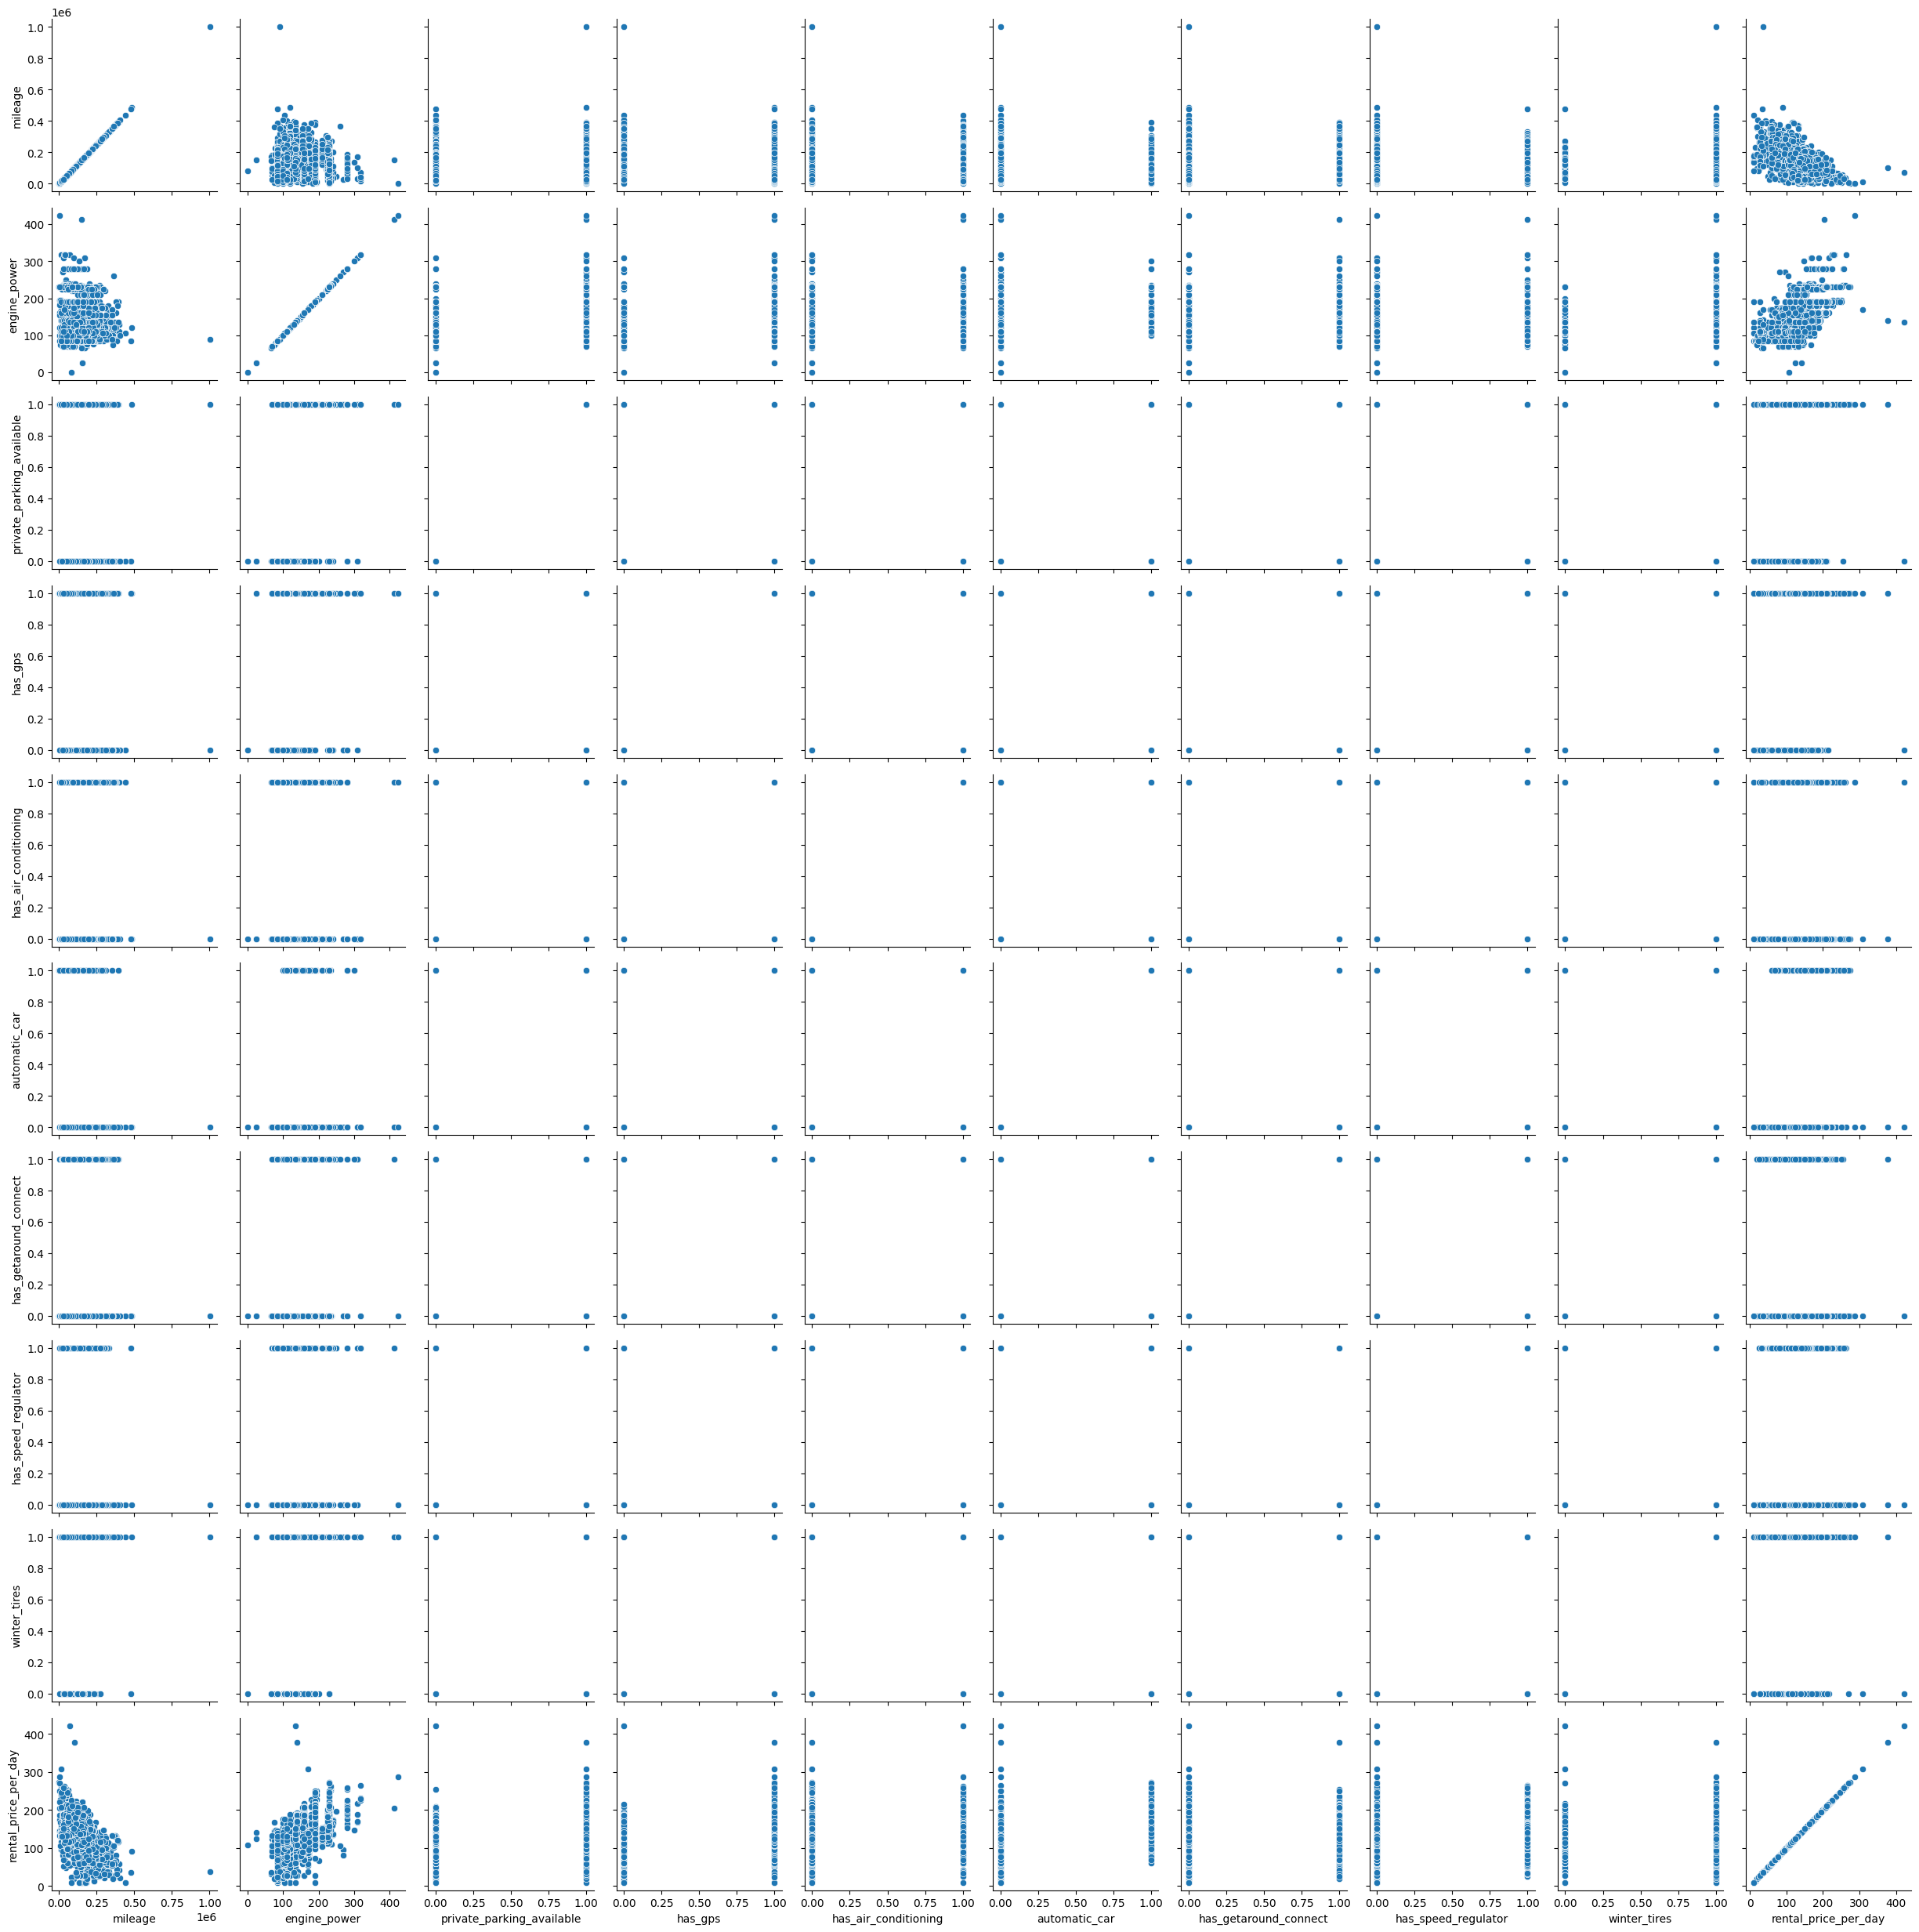

In [5]:
import seaborn as sns

g = sns.PairGrid(df)
g.map(sns.scatterplot)

<Axes: >

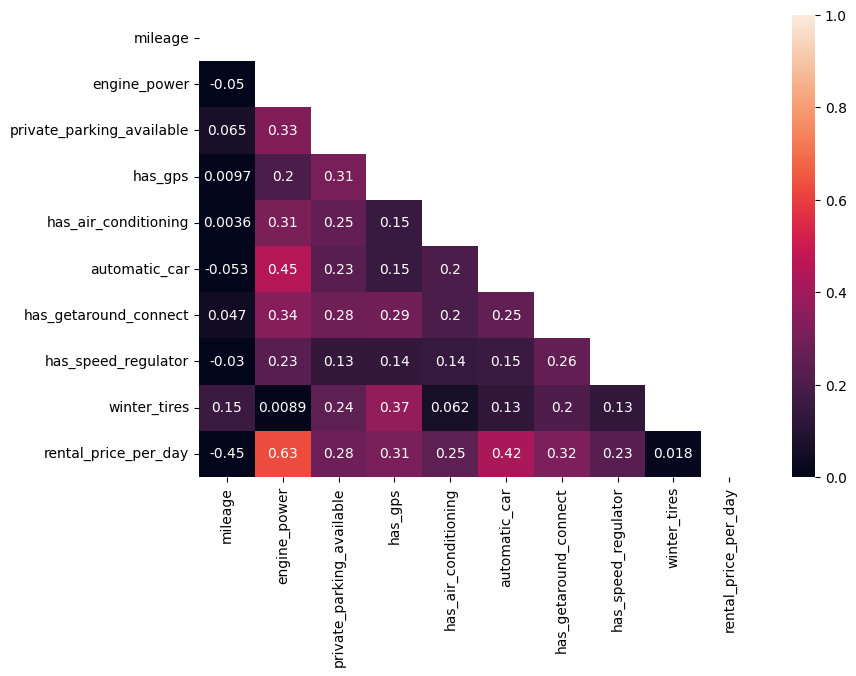

In [7]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(9, 6))

heatmap_mask = np.triu(corr)

sns.heatmap(corr, annot=True, vmin=0, vmax=+1, mask=heatmap_mask, ax=ax)

In [10]:
df.shape

(4843, 14)

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64']).columns.tolist()

column_types = [numeric_columns, categorical_columns, datetime_columns]
column_types


[['mileage', 'engine_power', 'rental_price_per_day'],
 ['model_key',
  'fuel',
  'paint_color',
  'car_type',
  'private_parking_available',
  'has_gps',
  'has_air_conditioning',
  'automatic_car',
  'has_getaround_connect',
  'has_speed_regulator',
  'winter_tires'],
 []]

In [13]:
from sklearn.calibration import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Séparation des variables indépendantes (features) et de la variable cible
target_variable = "rental_price_per_day"
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
  ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_transformer = Pipeline(steps=[
  ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [19]:
test = pd.DataFrame(columns=df.columns,
                    data=[["Citroën", 10, 6, "diesel", "black", "estate", True, True,
                          True, True, True, True, True, 0]])
test.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,10,6,diesel,black,estate,True,True,True,True,True,True,True,0


In [20]:
test = preprocessor.transform(test)

In [24]:
test_price = rcv.predict(test)
print(test_price)

[110.84989677]


In [13]:
# Création du modèle de régression linéaire
lr = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
lr.fit(X_train, Y_train)

print("score train : ", lr.score(X_train, Y_train))
print("score test : ", lr.score(X_test, Y_test))

score train :  0.7140101651301083
score test :  0.6937165554162578


In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

rcv = RidgeCV(cv=5)

rcv.fit(X_train, Y_train)

predict_train = rcv.predict(X_train)
predict_test = rcv.predict(X_test)

print("score train : ", rcv.score(X_train, Y_train))
print("score test : ", rcv.score(X_test, Y_test))

print("MAE train : ", mean_absolute_error(Y_train, predict_train))
print("MAE test : ", mean_absolute_error(Y_test, predict_test))

print("MAPE train : ", mean_absolute_percentage_error(Y_train, predict_train))
print("MAPE test : ", mean_absolute_percentage_error(Y_test, predict_test))

score train :  0.7133402922811032
score test :  0.6936976916079518
MAE train :  12.077089007453461
MAE test :  12.125578732863012
MAPE train :  0.1361625264415156
MAPE test :  0.1703775867175862


In [149]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rcv, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.7026373623915481
The standard deviation is :  0.040809945178553415


In [131]:
predictions_test = rcv.predict(X_test)

In [171]:
import plotly.graph_objects as go

# Votre code existant
result = pd.DataFrame()
result["real"] = Y_test.values
result["prediction"] = predictions_test
fig = px.scatter(result, y="real", x="prediction", opacity=0.5,
                 title="Prédictions vs Réalité")

# Ajouter une ligne
line = go.Scatter(x=result["real"], y=result["real"], mode='lines', name='Ligne de prédiction', line=dict(color='#00CC96', width=1))
fig.add_trace(line)
fig.update_layout(xaxis_title="Prédictions", yaxis_title="Valeurs réelles", showlegend=False)

fig.show()

In [177]:
result["residuals"] = Y_test.values - predictions_test
# standadize residuals
result["standardized_residuals"] = (result["residuals"] - result["residuals"].mean()) / result["residuals"].std()

fig = px.scatter(result, y="standardized_residuals", x="prediction", opacity=0.5,
           title="Prédictions vs Résidus standardisés")

line = go.Scatter(x=result["real"], y=result["real"].apply(lambda x: 0), mode='lines', name='Ligne de prédiction', line=dict(color='#00CC96', width=2))
fig.add_trace(line)
fig.update_layout(xaxis_title="Prédiction", yaxis_title="Résidus standardisés", showlegend=False)
fig.show()

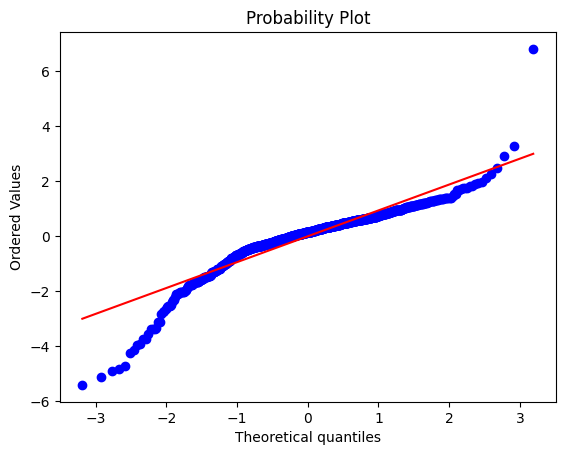

In [137]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create Q-Q plot
stats.probplot(result["standardized_residuals"], dist="norm", plot=plt)

# Show the plot
plt.show()


In [34]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

feature_importance = pd.DataFrame(index = column_names, data = rcv.coef_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances')

fig = px.bar(feature_importance, orientation = 'h', height=1000)
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

In [11]:
import joblib

joblib.dump(rcv, 'api/ML_models/ridge_cv.pkl')
joblib.dump(preprocessor, 'api/ML_models/preprocessor.pkl')

['api/ML_models/preprocessor.pkl']

In [123]:
import tensorflow as tf

train = tf.data.Dataset.from_tensor_slices((X_train.toarray(),Y_train))
test = tf.data.Dataset.from_tensor_slices((X_test.toarray(),Y_test))

train_shuffle = train.shuffle(buffer_size=len(X_train.toarray()))
test_shuffle = test.shuffle(buffer_size=len(X_test.toarray()))

train_batch = train_shuffle.batch(batch_size=8)
test_batch = test_shuffle.batch(batch_size=8)

# Define the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(train_batch, epochs=100, validation_data=test_batch)

In [125]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                      ),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                      )
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='loss'    
)
fig.show()

In [126]:
from sklearn.metrics import r2_score

# Prédire les valeurs sur le jeu de test
predictions_train = model(X_train.toarray())
predictions_test = model(X_test.toarray())

# Calculer le R2 score
r2_train = r2_score(Y_train, predictions_train)
r2_test = r2_score(Y_test, predictions_test)

print("R2 Score train: ", r2_train)
print("R2 Score test: ", r2_test)

R2 Score train:  0.7950916579481011
R2 Score test:  0.71987269912243


In [127]:
print(Y_test.values.shape)
print(predictions_test.numpy().flatten().shape)

(969,)
(969,)


In [128]:
import plotly.graph_objects as go

# Votre code existant
result = pd.DataFrame()
result["real"] = Y_test.values
result["prediction"] = predictions_test.numpy().flatten()
fig = px.scatter(result, y="real", x="prediction")

# Ajouter une ligne
line = go.Scatter(x=result["real"], y=result["real"], mode='lines', name='Ligne de prédiction')
fig.add_trace(line)

fig.show()

In [129]:
result["residuals"] = Y_test.values - predictions_test.numpy().flatten()
# standadize residuals
result["standardized_residuals"] = (result["residuals"] - result["residuals"].mean()) / result["residuals"].std()

px.scatter(result, y="standardized_residuals", x="prediction")

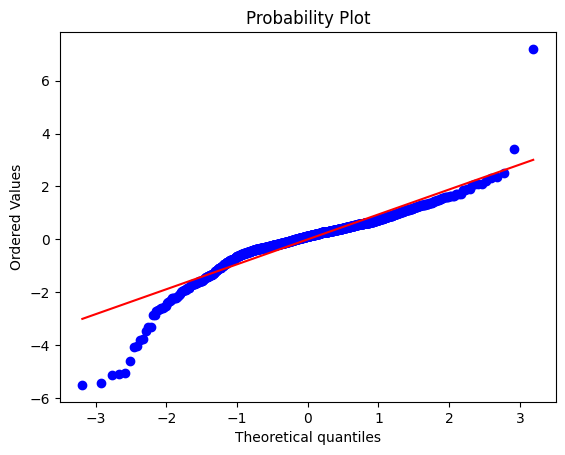

In [130]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create Q-Q plot
stats.probplot(result["standardized_residuals"], dist="norm", plot=plt)

# Show the plot
plt.show()
